In [1]:
#IMPORT INDEPENDENCIES AND MOUNT DRIVE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#READ DATA FROM PANDAS LIBRARY
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/Datasets/Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
# Importing the dataset
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


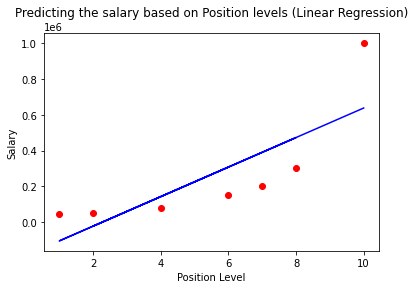

In [4]:
# Fitting the Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train, y_train)

#Visualizing the Linear Regression
plt.scatter(X_train,y_train, color='red')
plt.plot(X_train,model.predict(X_train),color='blue')
plt.title('Predicting the salary based on Position levels (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()



In [5]:
# Fitting Polynomial Regression to the dataset (Adding that curve in line)
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly,y_train)





LinearRegression()

In [6]:
poly_reg.fit_transform(X_test)

array([[1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02]])

In [7]:
#Predicting the model
prediction = poly_model.predict(poly_reg.fit_transform(X_test))
prediction

array([ 63555.47530091, 552670.08013598, 117231.50005642])

In [8]:
y_test

array([ 60000, 500000, 110000])

In [9]:
#Checking the accuracy
acc = poly_model.score(poly_reg.fit_transform(X_test),y_test)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, prediction)
print("Accuracy score is: ", acc)
print("R2 score is: ", r2)

Accuracy score is:  0.9755392877150003
R2 score is:  0.9755392877150003


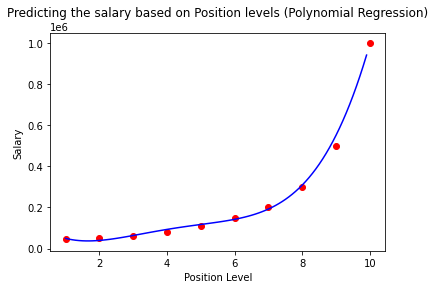

In [10]:
#Visualizing the Polynomial Regression
X_grid= np.arange(min(X_train),max(X_train),0.1)
X_grid= X_grid.reshape(len(X_grid),1)
plt.scatter(X,y, color='red')
plt.plot(X_grid, poly_model.predict(poly_reg.fit_transform(X_grid)),color='blue')
plt.title('Predicting the salary based on Position levels (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()


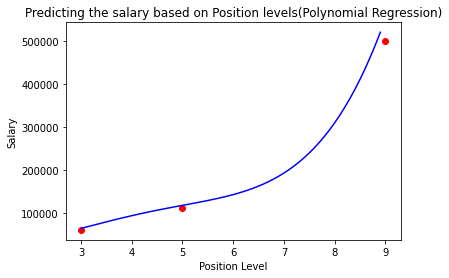

In [11]:
#PREDICTING ON TEST DATASET
X_grid= np.arange(min(X_test),max(X_test),0.1)
X_grid= X_grid.reshape(len(X_grid),1)
plt.scatter(X_test,y_test, color='red')
plt.plot(X_grid,poly_model.predict(poly_reg.fit_transform(X_grid)),color='blue')
plt.title('Predicting the salary based on Position levels(Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [12]:
#PREDICT MODEL MANUALLY
pred = poly_model.predict(poly_reg.fit_transform([[3]]))
print("So predicted salary is: ", pred[0])


So predicted salary is:  63555.475300909835
